# Problem 1


In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

biden = pd.read_csv("biden.csv", sep = ',', header = 0)
biden = biden.dropna()
biden.head()

,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1


In [3]:
y = biden['biden'].values
X = biden[['female', 'age', 'educ', 'dem', 'rep']].values
print(biden.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1807 entries, 0 to 1806
Data columns (total 6 columns):
biden     1807 non-null int64
female    1807 non-null int64
age       1807 non-null int64
educ      1807 non-null int64
dem       1807 non-null int64
rep       1807 non-null int64
dtypes: int64(6)
memory usage: 98.8 KB
None


## (a)

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
import graphviz

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3,
                                                    random_state=25)
biden_tree1 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)
regressor1 = biden_tree1.fit(X_train, y_train)
regressor1

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

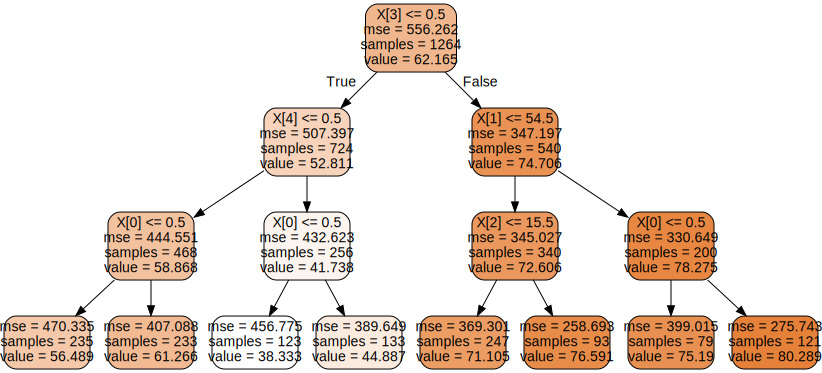

In [99]:
biden_tree_viz1 = export_graphviz(
    biden_tree1,
    out_file=None,
    # feature_names=iris.feature_names[2:],
    # class_names=iris.target_names,
    rounded=True,
    filled=True,
)

graph = graphviz.Source(biden_tree_viz1)
graph.render('biden_tree_viz1')
graph

In [28]:
y_pred = biden_tree1.predict(X_test)
MSE1 = mean_squared_error(y_test, y_pred)
print('Test MSE is: ', MSE1)

Test MSE is:  396.193714632


Interpretation: 

There are 235 samples in the training set that are male, non-republican and non-democrat. The average feeling themometer value is 56.489, and the MSE is 470.335.

There are 233 samples in the training set that are female, non-republican and non-demoncrat. The average feeling themometer value is 61.266, and the MSE is 407.088.

There are 123 samples in the training set that are male and republican. The average feeling themometer value is 38.33, and the MSE is 456.775.

There are 133 samples in the training set that are female and republican. The average feeling themometer value is 44.887, and the MSE is 389.649.

There are 247 samples in the training set that have less than 16 years of education, under 55 years old, and demoncrat. The average feeling themometer value is 71.105, and the MSE is 369.301.

There are 93 samples in the training set that have more than 16 years of education, under 55 years old and demoncrat. The average feeling themometer value is 76.591, and the MSE is 258.693.

There are 79 samples in the training set that are male, 55 years old or above, and demoncrat. The average feeling themometer value is 75.19, and the MSE is 399.015.

There are 121 samples in the training set that are female,55 years old or above, and demoncrat. The average feeling themometer value is 80.289, and the MSE is 275.743.

The test MSE is 396.194. 

## (b)

In [100]:
num_rows_train = len(y_train)

In [123]:
def prune_tree(max_d, X_train, y_train, X_test, y_test): 
    l_result = []
    for d in range(1, max_d + 1):
        biden_tree2 = DecisionTreeRegressor(min_samples_leaf=5, max_depth=d)
        biden_tree2.fit(X_train, y_train)
        y_pred2 = biden_tree2.predict(X_test)
        MSE2 = mean_squared_error(y_test, y_pred2)
        l_result.append(MSE2)
    
    
    return l_result
    

In [124]:
result2 = prune_tree(30, X_train, y_train, X_test, y_test)

In [125]:
result2

[420.02245293496679,
 400.06539818418173,
 396.19371463213071,
 404.59602362340974,
 411.80592737244535,
 420.54630391491509,
 435.94288763025958,
 465.0669714073918,
 462.3674415271974,
 468.33297195908369,
 472.93714573994737,
 478.66637232414195,
 476.98696620462272,
 479.93391163302533,
 481.52903965123681,
 482.66854241366775,
 482.81587206375985,
 480.87183478033825,
 480.87183478033825,
 482.84236885031982,
 482.81587206375985,
 482.84236885031982,
 480.55067869359414,
 482.66854241366775,
 482.84236885031982,
 482.84236885031982,
 482.81587206375985,
 480.7245051302462,
 482.81587206375985,
 482.66854241366775]

In [131]:
opt_MSE = min(result2)
opt_d = 1
for d in range(1, 30):
    if result2[d - 1] == opt_MSE:
        opt_d = d

opt_d


3

max_depth = 3 will be the optimal with the minimum MSE for d from 1 to 30.

In [141]:
biden_tree2 = DecisionTreeRegressor(min_samples_leaf=5, max_depth=3)
biden_tree2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [142]:
y_pred = biden_tree2.predict(X_test)
MSE2 = mean_squared_error(y_test, y_pred)
print('Test MSE is: ', MSE2)

Test MSE is:  396.193714632


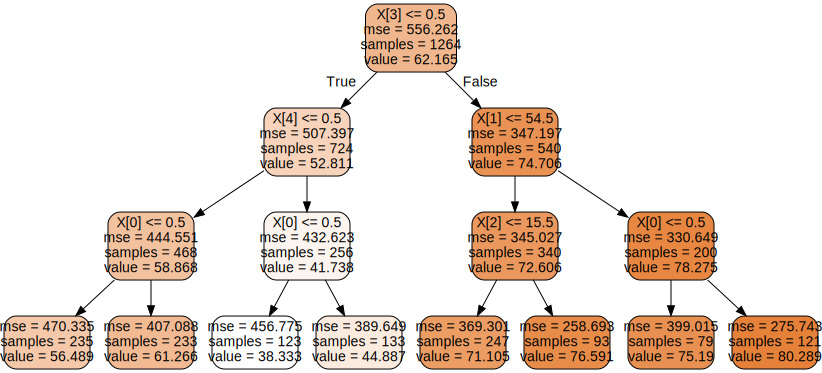

In [143]:
biden_tree_viz2 = export_graphviz(
    biden_tree2,
    out_file=None,
    # feature_names=iris.feature_names[2:],
    # class_names=iris.target_names,
    rounded=True,
    filled=True,
)

graph = graphviz.Source(biden_tree_viz2)
graph.render('biden_tree_viz2')
graph

Interpretation: 

There are 235 samples in the training set that are male, non-republican and non-democrat. The average feeling themometer value is 56.489, and the MSE is 470.335.

There are 233 samples in the training set that are female, non-republican and non-demoncrat. The average feeling themometer value is 61.266, and the MSE is 407.088.

There are 123 samples in the training set that are male and republican. The average feeling themometer value is 38.33, and the MSE is 456.775.

There are 133 samples in the training set that are female and republican. The average feeling themometer value is 44.887, and the MSE is 389.649.

There are 247 samples in the training set that have less than 16 years of education, under 55 years old, and demoncrat. The average feeling themometer value is 71.105, and the MSE is 369.301.

There are 93 samples in the training set that have more than 16 years of education, under 55 years old and demoncrat. The average feeling themometer value is 76.591, and the MSE is 258.693.

There are 79 samples in the training set that are male, 55 years old or above, and demoncrat. The average feeling themometer value is 75.19, and the MSE is 399.015.

There are 121 samples in the training set that are female,55 years old or above, and demoncrat. The average feeling themometer value is 80.289, and the MSE is 275.743.

The test MSE is 396.194. 

Yes, as we can see from the list of result, pruning tree to the optimal maximum depth improves the result.

## (c)

In [8]:
from sklearn.ensemble import BaggingRegressor
# n_estimators is how many samples from the data to take (the number of trees)
# max_samples is the maximum number of observations to include in each bootstrapped data sample
biden_tree3 = BaggingRegressor(DecisionTreeRegressor(), n_estimators=100,
                            max_samples=100, bootstrap=True, oob_score=True, random_state=15)
biden_tree3.fit(X, y)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=100, n_jobs=1, oob_score=True,
         random_state=15, verbose=0, warm_start=False)

In [9]:
biden_tree3.score(X, y)
y_pred3 = biden_tree3.oob_prediction_
MSE3 = mean_squared_error(y, y_pred3)
print('MSE=', MSE3)

MSE= 406.000558395


In [10]:
importances = np.mean([
    tree.feature_importances_ for tree in biden_tree3.estimators_
], axis=0)
importances

array([ 0.06015927,  0.4429127 ,  0.20057626,  0.19032354,  0.10602823])

In [11]:
# Print the feature ranking
std = np.std([tree.feature_importances_ for tree in biden_tree3.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

features = ['female', 'age', 'educ', 'dem', 'rep']
for f in range(X.shape[1]):
    print(str(f+1), ". ", features[f], ": ",str(importances[indices[f]]))

Feature ranking:
1 .  female :  0.442912703961
2 .  age :  0.200576259716
3 .  educ :  0.190323544392
4 .  dem :  0.106028225513
5 .  rep :  0.060159266419


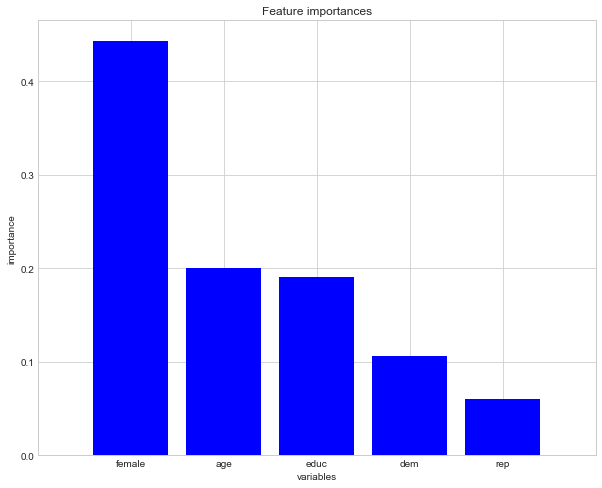

In [12]:
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

# Plot the feature importances of the bagging regressor
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", align="center")
plt.xticks(range(X.shape[1]), features)
plt.xlim([-1, X.shape[1]])
plt.xlabel('variables')
plt.ylabel('importance')
plt.show()

The result indicates that among all the trees considered in the bagging approach, gender and age are by far the two most important variables. 

## (d)

In [75]:
from sklearn.ensemble import RandomForestRegressor

# m = 1
biden_random1 = RandomForestRegressor(n_estimators=53, max_features=1, bootstrap=True,
                                  oob_score=True, random_state=25)
biden_random1.fit(X, y)

biden_random1.score(X, y)

0.69664175656147853

In [58]:
y_pred4_1 = biden_random1.oob_prediction_
MSE4_1 = mean_squared_error(y, y_pred4_1)
print('MSE when m = 1 is:', MSE4_1)

MSE when m = 1 is: 538.323039782


In [68]:
importances = biden_random1.feature_importances_
std = np.std([tree.feature_importances_ for tree in biden_random1.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

features = ['female', 'age', 'educ', 'dem', 'rep']
for f in range(X.shape[1]):
    print(str(f+1), ". ", features[f], ": ",str(importances[indices[f]]))



Feature ranking:
1 .  female :  0.521792746993
2 .  age :  0.171313551155
3 .  educ :  0.149689594123
4 .  dem :  0.135904382543
5 .  rep :  0.0212997251865


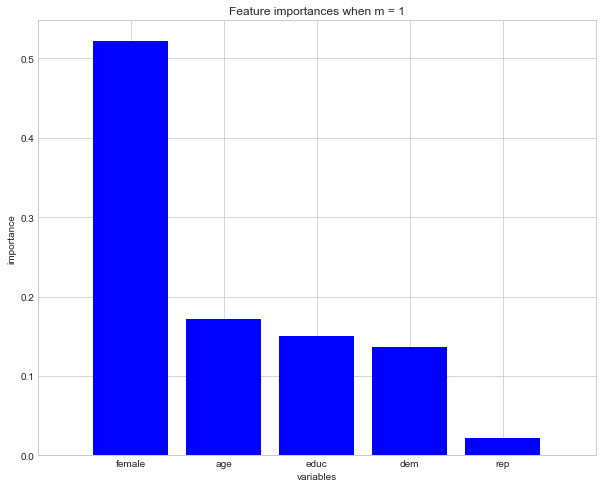

In [69]:
plt.figure()
plt.title("Feature importances when m = 1")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", align="center")
plt.xticks(range(X.shape[1]), features)
plt.xlim([-1, X.shape[1]])
plt.xlabel('variables')
plt.ylabel('importance')
plt.show()

Female decreases the impurity in a tree the most. Female decreases the impurity by 0.522. The number of variables considered at each split is 1. 

In [79]:
# m = 2
biden_random2 = RandomForestRegressor(n_estimators=53, max_features=2, bootstrap=True,
                                  oob_score=True, random_state=25)
biden_random2.fit(X, y)

biden_random2.score(X, y)

0.6968933794106853

In [80]:
y_pred4_2 = biden_random2.oob_prediction_
MSE4_2 = mean_squared_error(y, y_pred4_2)
print('MSE when m = 2 is:', MSE4_2)

MSE when m = 2 is: 539.564079727


In [81]:
importances = biden_random2.feature_importances_
std = np.std([tree.feature_importances_ for tree in biden_random2.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

features = ['female', 'age', 'educ', 'dem', 'rep']
for f in range(X.shape[1]):
    print(str(f+1), ". ", features[f], ": ",str(importances[indices[f]]))



Feature ranking:
1 .  female :  0.514310297442
2 .  age :  0.180906444052
3 .  educ :  0.153673642926
4 .  dem :  0.130763530253
5 .  rep :  0.0203460853264


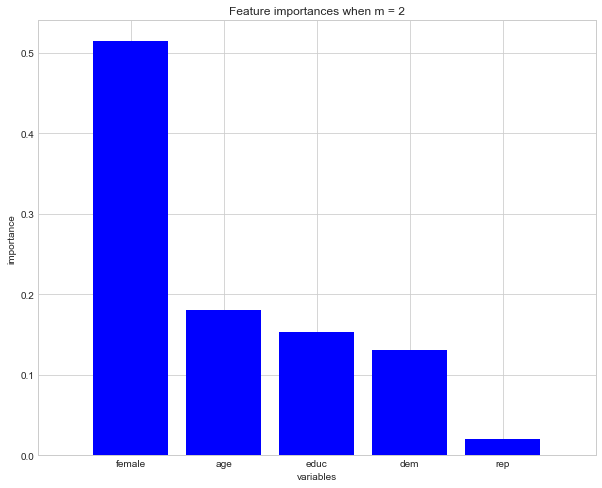

In [82]:
plt.figure()
plt.title("Feature importances when m = 2")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", align="center")
plt.xticks(range(X.shape[1]), features)
plt.xlim([-1, X.shape[1]])
plt.xlabel('variables')
plt.ylabel('importance')
plt.show()

Female decreases the impurity in a tree the most, followed by age. Female decreases the impurity by 0.514, and age decreases the impurity by 0.181. The number of variables considered at each split is 2. 

In [73]:
# m = 3
biden_random3 = RandomForestRegressor(n_estimators=53, max_features=3, bootstrap=True,
                                  oob_score=True, random_state=25)
biden_random3.fit(X, y)

biden_random3.score(X, y)

0.69806740197524064

In [72]:
y_pred4_3 = biden_random3.oob_prediction_
MSE4_3 = mean_squared_error(y, y_pred4_3)
print('MSE when m = 3 is:', MSE4_3)

MSE when m = 3 is: 536.607395689


In [83]:
importances = biden_random3.feature_importances_
std = np.std([tree.feature_importances_ for tree in biden_random3.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

features = ['female', 'age', 'educ', 'dem', 'rep']
for f in range(X.shape[1]):
    print(str(f+1), ". ", features[f], ": ",str(importances[indices[f]]))



Feature ranking:
1 .  female :  0.489253548361
2 .  age :  0.202285989734
3 .  educ :  0.169220771829
4 .  dem :  0.110103346436
5 .  rep :  0.0291363436395


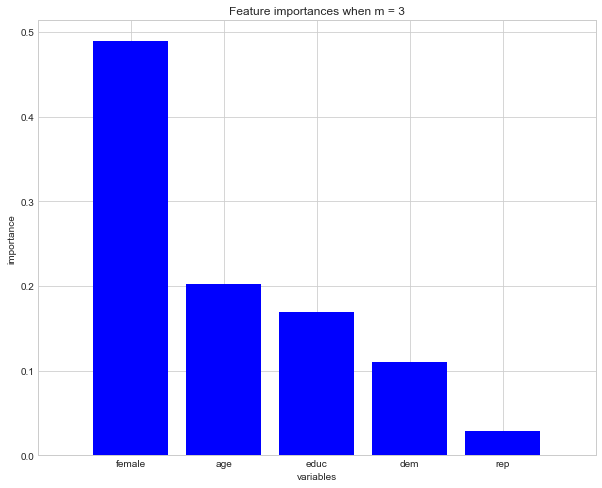

In [84]:
plt.figure()
plt.title("Feature importances when m = 3")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", align="center")
plt.xticks(range(X.shape[1]), features)
plt.xlim([-1, X.shape[1]])
plt.xlabel('variables')
plt.ylabel('importance')
plt.show()

Female decreases the impurity in a tree the most, age the second, and educ the third. Female decreases the impurity by 0.489, age decreases the impurity by 0.202, and educ by 0.169. The number of variables considered at each split is 3. 

In [71]:
print('Test MSE when m = 1 is: {},\
      \nTest MSE when m = 2 is: {},\
      \nTest MSE when m = 3 is: {}'.format(MSE4_1, MSE4_2, MSE4_3))

Test MSE when m = 1 is: 538.3230397820951,      
Test MSE when m = 2 is: 539.5640797270379,      
Test MSE when m = 3 is: 536.6073956886949


m increases the error rate when m changes from 1 to 2, but m decreases error rate when m changes from 2 to 3. 